# Experiment 1A

refer to one note for detailed description under docs/project_document.

## Data analysis: time series decomposition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

import plotly
import plotly.graph_objects as go


In [2]:
np.random.seed(45)

In [3]:
data_path = ".././data/"
file_name = "data.csv"
data = pd.read_csv(data_path + file_name)
data.head()

time  Comms and Services  Space Heating  Hot Water  \
0  2019-04-01 00:00:00+00            0.515253       0.856489   0.000000   
1  2019-04-01 01:00:00+00            0.687381       0.786147   0.085386   
2  2019-04-01 02:00:00+00            0.687678       3.530669   0.099239   
3  2019-04-01 03:00:00+00            0.690139       4.044003   0.098467   
4  2019-04-01 04:00:00+00            0.687081       4.223769   0.091533   

    Sockets  Lighting  Bld_EngCons  Car Chargers  weekend  bank holiday  ...  \
0  0.051467  0.124797     1.548006      0.032239    False         False  ...   
1  0.050931  0.151708     1.761553      0.042894    False         False  ...   
2  0.055706  0.151233     4.524525      0.043100    False         False  ...   
3  0.050019  0.151436     5.034064      0.043131    False         False  ...   
4  0.050142  0.151331     5.203856      0.043031    False         False  ...   

   forecastperiod  forecast_temperature  forecast_feelslike  \
0             NaN                   NaN                 NaN   
1             NaN                   NaN                 NaN   
2             NaN                   NaN                 NaN   
3             NaN                   NaN                 NaN   
4             NaN                   NaN                 NaN   

   forecast_weathertype  forecast_windspeed forecast_uvindex  \
0                   NaN                 NaN              NaN   
1                   NaN                 NaN              NaN   
2                   NaN                 NaN              NaN   
3                   NaN                 NaN              NaN   
4                   NaN                 NaN              NaN   

  forecast_precipitationprobability  forecast_winddirection  \
0                               NaN                     NaN   
1                               NaN                     NaN   
2                               NaN                     NaN   
3                               NaN                     NaN   
4                               NaN                     NaN   

   forecast_visibility  forecast_interval  
0                  NaN                NaN  
1                  NaN                NaN  
2                  NaN                NaN  
3                  NaN                NaN  
4                  NaN                NaN  

[5 rows x 26 columns]

In [4]:
# rename the columns to make it easier for accessing
new_col_names_map =  {i: i.lower().replace(" ", "_") for i in data.columns}
data = data.rename(columns=new_col_names_map)
# set the timestamp as the index for easy access of the data
data = data.set_index("time")
# subset the dataset to load only the post covid dataset
data = data[data.index >= "2021-01-01"]

In [5]:
data.shape # this is the size of the data

(26280, 25)

In [6]:
data.head()

comms_and_services  space_heating  hot_water  \
time                                                                   
2021-01-01 00:00:00+00            0.591504       3.425193   0.000000   
2021-01-01 01:00:00+00            0.591203       4.012907   0.000000   
2021-01-01 02:00:00+00            0.591666       5.342417   0.444782   
2021-01-01 03:00:00+00            0.591278       5.756598   0.000000   
2021-01-01 04:00:00+00            0.591354       5.415492   0.000000   

                         sockets  lighting  bld_engcons  car_chargers  \
time                                                                    
2021-01-01 00:00:00+00  0.049433  0.154873     4.221002           0.0   
2021-01-01 01:00:00+00  0.047753  0.154846     4.806708           0.0   
2021-01-01 02:00:00+00  0.051869  0.154997     6.585732           0.0   
2021-01-01 03:00:00+00  0.043028  0.154626     6.545530           0.0   
2021-01-01 04:00:00+00  0.050306  0.154498     6.211650           0.0   

                        weekend  bank_holiday  hour  ...  \
time                                                 ...   
2021-01-01 00:00:00+00    False          True     0  ...   
2021-01-01 01:00:00+00    False          True     1  ...   
2021-01-01 02:00:00+00    False          True     2  ...   
2021-01-01 03:00:00+00    False          True     3  ...   
2021-01-01 04:00:00+00    False          True     4  ...   

                                forecastperiod  forecast_temperature  \
time                                                                   
2021-01-01 00:00:00+00  2021-01-02 00:00:00+00                   3.0   
2021-01-01 01:00:00+00  2021-01-02 00:00:00+00                   3.0   
2021-01-01 02:00:00+00  2021-01-02 00:00:00+00                   3.0   
2021-01-01 03:00:00+00  2021-01-02 03:00:00+00                   2.0   
2021-01-01 04:00:00+00  2021-01-02 03:00:00+00                   2.0   

                        forecast_feelslike  forecast_weathertype  \
time                                                               
2021-01-01 00:00:00+00                -1.0                   2.0   
2021-01-01 01:00:00+00                -1.0                   2.0   
2021-01-01 02:00:00+00                -1.0                   2.0   
2021-01-01 03:00:00+00                -2.0                   0.0   
2021-01-01 04:00:00+00                -2.0                   0.0   

                       forecast_windspeed forecast_uvindex  \
time                                                         
2021-01-01 00:00:00+00               11.0              0.0   
2021-01-01 01:00:00+00               11.0              0.0   
2021-01-01 02:00:00+00               11.0              0.0   
2021-01-01 03:00:00+00               11.0              0.0   
2021-01-01 04:00:00+00               11.0              0.0   

                        forecast_precipitationprobability  \
time                                                        
2021-01-01 00:00:00+00                                0.0   
2021-01-01 01:00:00+00                                0.0   
2021-01-01 02:00:00+00                                1.0   
2021-01-01 03:00:00+00                                1.0   
2021-01-01 04:00:00+00                                1.0   

                        forecast_winddirection  forecast_visibility  \
time                                                                  
2021-01-01 00:00:00+00                       N                   VG   
2021-01-01 01:00:00+00                       N                   VG   
2021-01-01 02:00:00+00                       N                   VG   
2021-01-01 03:00:00+00                     NNW                   VG   
2021-01-01 04:00:00+00                     NNW                   VG   

                        forecast_interval  
time                                       
2021-01-01 00:00:00+00              1 day  
2021-01-01 01:00:00+00           23:00:00  
2021-01-01 02:00:00+00           22:00:00  
2021-01-01 03:00:00+00 

### Handle missing values

In [7]:
circuit_columns = [
    "comms_and_services", "space_heating", "hot_water", "sockets", "lighting", "car_chargers"
]
data[circuit_columns].isna().sum()

comms_and_services    444
space_heating         444
hot_water             444
sockets               444
lighting              444
car_chargers          444
dtype: int64

In [8]:
# interpolate only the cirucit columns to consider for decomposition plot
for column in circuit_columns:
    data[column] = data[column].interpolate(method="linear", limit_direction="both")

data[circuit_columns].isna().sum()

comms_and_services    0
space_heating         0
hot_water             0
sockets               0
lighting              0
car_chargers          0
dtype: int64

### Decomposition as additive model 

#### Comms and services

In [16]:

result = seasonal_decompose(data["comms_and_services"], model='additive', period=24)
result.plot()
plt.xticks(rotation=90)
plt.show()

#### Space heating

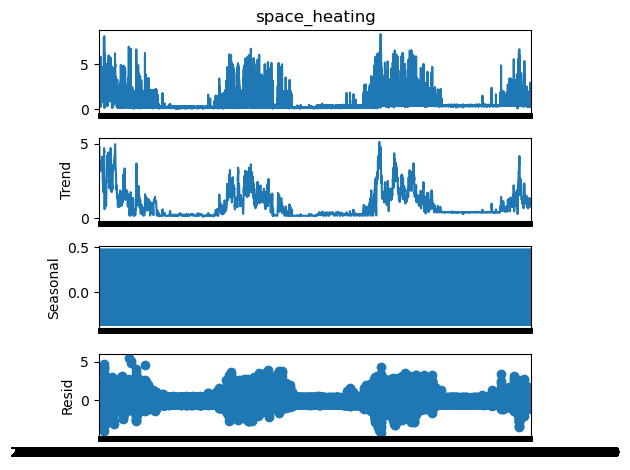

In [17]:
result = seasonal_decompose(data["space_heating"], model='additive', period=24)
result.plot()
plt.show()

#### Car Chargers

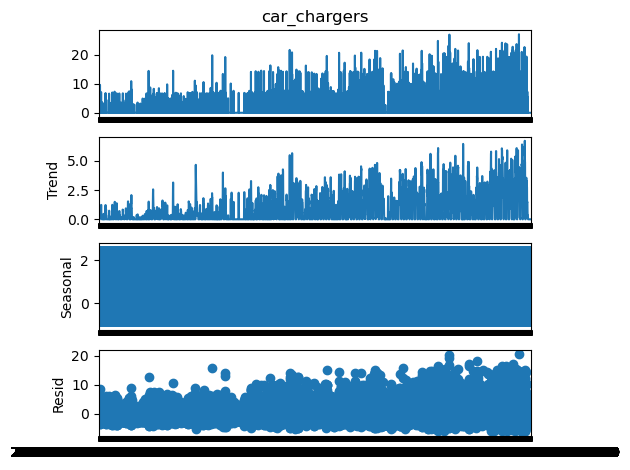

In [18]:
result = seasonal_decompose(data["car_chargers"], model='additive', period=24)
result.plot()
plt.show()

#### All other circuits - aka - building energy consumption

In [22]:
single_circuits = ["comms_and_services", "space_heating", "car_chargers"]
plot_data = data.drop(columns=single_circuits, axis=1)
plot_data.shape

(26280, 22)

In [29]:
other_circuits = ["hot_water", "sockets", "lighting"]
plot_data["total_load"] = plot_data[other_circuits].sum(axis=1)

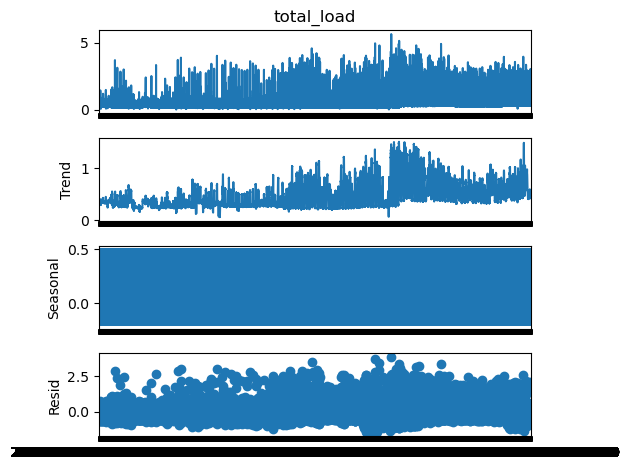

In [30]:
result = seasonal_decompose(plot_data["total_load"], model='additive', period=24)
result.plot()
plt.show()

## Feature Engineering

#### Handle missing values for the rest of the fields

In [9]:
missing_columns = pd.DataFrame(data.isna().sum().reset_index())
missing_columns = missing_columns[missing_columns[0] > 0]
missing_columns = missing_columns["index"].tolist()

# impute the data
for column in missing_columns:
    data[column] = data[column].interpolate(method="linear", limit_direction="both")

data.isna().sum()

C:\Users\akson\AppData\Local\Temp\ipykernel_16024\1941193596.py:7: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data[column] = data[column].interpolate(method="linear", limit_direction="both")


comms_and_services                     0
space_heating                          0
hot_water                              0
sockets                                0
lighting                               0
bld_engcons                            0
car_chargers                           0
weekend                                0
bank_holiday                           0
hour                                   0
day_of_week                            0
day_of_month                           0
month                                  0
year                                   0
forecast_datadate                      0
forecastperiod                       578
forecast_temperature                   0
forecast_feelslike                     0
forecast_weathertype                   0
forecast_windspeed                     0
forecast_uvindex                       0
forecast_precipitationprobability      0
forecast_winddirection               578
forecast_visibility                  578
forecast_interva

In [10]:
# drop the forecastperiod column
data = data.drop(columns=["forecastperiod", "forecast_interval", "forecast_datadate"], axis=0)
data.shape

(26280, 22)

#### Apply Transformations

In [11]:
# transform the forecast visibility

# Reference
# https://www.metoffice.gov.uk/weather/guides/what-does-this-forecast-mean#:~:text=Visibility%20measures%20the%20distance%20at,Less%20than%201%2C000%20metres
visibility_map = {
    "EX": 6, "VG": 5, "GO": 4, "MO": 3, "PO": 2, "VP": 1
}

data["forecast_visibility"] = data["forecast_visibility"].map(visibility_map)
data["forecast_visibility"].head()

time
2021-01-01 00:00:00+00    5.0
2021-01-01 01:00:00+00    5.0
2021-01-01 02:00:00+00    5.0
2021-01-01 03:00:00+00    5.0
2021-01-01 04:00:00+00    5.0
Name: forecast_visibility, dtype: float64

In [12]:
# forecast winddirection convertion to degrees 
data = data.copy()
degrees_map = pd.read_csv(".././data/degrees.csv", sep=",")
degrees_lookup = {abbrv: deg for abbrv, deg in zip(degrees_map["Abbrv."], degrees_map["Degrees"])}
data["forecast_winddirection"] = data["forecast_winddirection"].map(degrees_lookup)
data["forecast_winddirection"].value_counts()

forecast_winddirection
247.5    3434
270.0    2747
225.0    2398
292.5    2311
90.0     1669
315.0    1667
112.5    1639
337.5    1594
202.5    1485
180.0    1245
0.0      1073
135.0    1062
67.5     1025
45.0      872
157.5     773
22.5      708
Name: count, dtype: int64

In [13]:
# cyclic transformations
denom_map = {
    "hour": 24, "month": 12, "day_of_week": 7, "forecast_winddirection": 360
}

for col_name in denom_map:
    print(col_name)
    data[f"sine_{col_name}"] = np.sin(2 * np.pi * data[col_name] / denom_map[col_name])
    data[f"cos_{col_name}"] = np.cos(2 * np.pi * data[col_name] / denom_map[col_name])


hour
month
day_of_week
forecast_winddirection


In [14]:
# boolean transformation
data["weekend"] = data["weekend"].astype(int)
data["bank_holiday"] = data["bank_holiday"].astype(int)

In [15]:
data.head()

comms_and_services  space_heating  hot_water  \
time                                                                   
2021-01-01 00:00:00+00            0.591504       3.425193   0.000000   
2021-01-01 01:00:00+00            0.591203       4.012907   0.000000   
2021-01-01 02:00:00+00            0.591666       5.342417   0.444782   
2021-01-01 03:00:00+00            0.591278       5.756598   0.000000   
2021-01-01 04:00:00+00            0.591354       5.415492   0.000000   

                         sockets  lighting  bld_engcons  car_chargers  \
time                                                                    
2021-01-01 00:00:00+00  0.049433  0.154873     4.221002           0.0   
2021-01-01 01:00:00+00  0.047753  0.154846     4.806708           0.0   
2021-01-01 02:00:00+00  0.051869  0.154997     6.585732           0.0   
2021-01-01 03:00:00+00  0.043028  0.154626     6.545530           0.0   
2021-01-01 04:00:00+00  0.050306  0.154498     6.211650           0.0   

                        weekend  bank_holiday  hour  ...  \
time                                                 ...   
2021-01-01 00:00:00+00        0             1     0  ...   
2021-01-01 01:00:00+00        0             1     1  ...   
2021-01-01 02:00:00+00        0             1     2  ...   
2021-01-01 03:00:00+00        0             1     3  ...   
2021-01-01 04:00:00+00        0             1     4  ...   

                        forecast_winddirection  forecast_visibility  \
time                                                                  
2021-01-01 00:00:00+00                     0.0                  5.0   
2021-01-01 01:00:00+00                     0.0                  5.0   
2021-01-01 02:00:00+00                     0.0                  5.0   
2021-01-01 03:00:00+00                   337.5                  5.0   
2021-01-01 04:00:00+00                   337.5                  5.0   

                        sine_hour  cos_hour  sine_month  cos_month  \
time                                                                 
2021-01-01 00:00:00+00   0.000000  1.000000         0.5   0.866025   
2021-01-01 01:00:00+00   0.258819  0.965926         0.5   0.866025   
2021-01-01 02:00:00+00   0.500000  0.866025         0.5   0.866025   
2021-01-01 03:00:00+00   0.707107  0.707107         0.5   0.866025   
2021-01-01 04:00:00+00   0.866025  0.500000         0.5   0.866025   

                        sine_day_of_week  cos_day_of_week  \
time                                                        
2021-01-01 00:00:00+00         -0.974928        -0.222521   
2021-01-01 01:00:00+00         -0.974928        -0.222521   
2021-01-01 02:00:00+00         -0.974928        -0.222521   
2021-01-01 03:00:00+00         -0.974928        -0.222521   
2021-01-01 04:00:00+00         -0.974928        -0.222521   

                        sine_forecast_winddirection  \
time                                                  
2021-01-01 00:00:00+00                     0.000000   
2021-01-01 01:00:00+00                     0.000000   
2021-01-01 02:00:00+00                     0.000000   
2021-01-01 03:00:00+00                    -0.382683   
2021-01-01 04:00:00+00                    -0.382683   

                        cos_forecast_winddirection  
time                                                
2021-01-01 00:00:00+00                     1.00000  
2021-01-01 01:00:00+00                     1.00000  
2021-01-01 02:00:00+00                     1.00000  
2021-01-01 03:00:00+00                     0.92388  
2021-01-01 04:00:00+00                     0.92388  

[5 rows x 30 columns]

#### Standardize the data

In [16]:
def create_std_scaler(data, column_name):
    data_scaler = StandardScaler()
    if isinstance(column_name, str):
        column_name = [column_name]
    data_scaler = data_scaler.fit(data[column_name])
    transformed_data = data.copy()
    transformed_data[column_name] = data_scaler.transform(data[column_name])
    scaling_info = pd.DataFrame({
        "columns": column_name,
        "mean": data_scaler.mean_,
        "variance": data_scaler.var_,
        "scale_factor": data_scaler.scale_
    })
    print(scaling_info)
    return data_scaler, transformed_data[column_name]

In [156]:
def cal_metrics(actual, predictions):
    print("MAE:")
    print(mean_absolute_error(actual, predictions))
    print("MAPE:")
    print(mean_absolute_percentage_error(actual, predictions))
    print("R2 score: ")
    print(r2_score(actual, predictions))

## Models

In [103]:
model_predictions = pd.DataFrame()

### Comms and services

#### Univariate Linear regression

In [38]:
col_name = "comms_and_services"
# transform the data
cs_data_scaler, transformed_data = create_std_scaler(data, col_name)

# Training and testing data for comms and services
cs_train_data = transformed_data[transformed_data.index < '2023-12-01'][[col_name]]
cs_test_data = transformed_data[transformed_data.index >= '2023-12-01'][[col_name]]
cs_train_data.shape, cs_test_data.shape

              columns      mean  variance  scale_factor
0  comms_and_services  0.510156   0.00442      0.066484


((25536, 1), (744, 1))

In [39]:
cs_train_data["y"] = cs_train_data[col_name].shift(-1)
cs_test_data["y"] = cs_test_data[col_name].shift(-1)

cs_train_data = cs_train_data.dropna(axis=0)
cs_test_data = cs_test_data.dropna(axis=0)

In [24]:
lin_reg = LinearRegression().fit(cs_train_data[col_name].to_numpy().reshape(cs_train_data.shape[0], 1), cs_train_data["y"].to_numpy())

In [25]:
cs_test_data["predictions"] = lin_reg.predict(cs_test_data[col_name].to_numpy().reshape(cs_test_data.shape[0], 1))

In [26]:
plot_data = cs_test_data.copy()
plot_data[["actual", "prediction"]]  = cs_data_scaler.inverse_transform(plot_data[["y", "predictions"]])
plot_data = plot_data.reset_index(drop=0)
plot_data.head()

time  comms_and_services         y  predictions  \
0  2023-12-01 00:00:00+00           -1.172138 -1.181014    -1.117032   
1  2023-12-01 01:00:00+00           -1.181014 -1.164950    -1.125501   
2  2023-12-01 02:00:00+00           -1.164950 -1.167362    -1.110173   
3  2023-12-01 03:00:00+00           -1.167362 -1.157462    -1.112475   
4  2023-12-01 04:00:00+00           -1.157462 -1.165100    -1.103028   

     actual  prediction  
0  0.431638    0.435891  
1  0.432706    0.435328  
2  0.432545    0.436347  
3  0.433203    0.436194  
4  0.432696    0.436822

In [27]:
cal_metrics(plot_data["y"], plot_data["predictions"])

MAE:
0.05491674565656422
MAPE:
0.04711074393464006
R2 score: 
-4.94302975127576


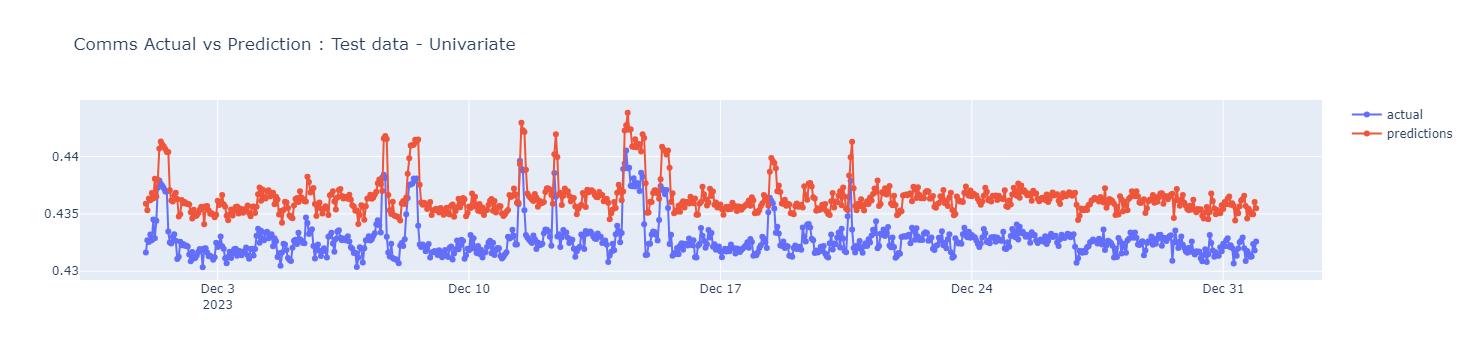

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["actual"].to_numpy(),
                    mode='lines+markers',
                    name='actual'))
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["prediction"].to_numpy(),
                    mode='lines+markers',
                    name='predictions'))
fig.update_layout(title_text="Comms Actual vs Prediction : Test data - Univariate")
fig.show()

In [35]:
asset_path = ".././assets/"

In [29]:
asset_path = ".././assets/"
file_name = 'uni_LR_comms_services.html'
plotly.offline.plot(fig, filename=asset_path + file_name)

'.././assets/uni_LR_comms_services.html'

#### Multivariate linear regression

In [104]:
column_name = ["comms_and_services", 'weekend', 'bank_holiday',
       'hour', 'day_of_week', 'day_of_month', 'month', 'year',
       'forecast_temperature', 'forecast_feelslike', 'forecast_weathertype',
       'forecast_windspeed', 'forecast_uvindex',
       'forecast_precipitationprobability', 'forecast_winddirection',
       'forecast_visibility', 'sine_hour', 'cos_hour', 'sine_month',
       'cos_month', 'sine_day_of_week', 'cos_day_of_week',
       'sine_forecast_winddirection', 'cos_forecast_winddirection', "y"]

# transform the data
cs_data = data.copy()
cs_data["y"] = cs_data[column_name[0]].shift(-1)
cs_data = cs_data.dropna(axis=0)
cs_data_scaler, transformed_data = create_std_scaler(cs_data, column_name[:-1])
cs_target_scaler, transformed_iv_data = create_std_scaler(cs_data, column_name[-1])

transformed_data = pd.concat(
    [transformed_data, transformed_iv_data], axis=1, ignore_index=False
)

# Training and testing data for comms and services
cs_train_data = transformed_data[transformed_data.index < '2023-12-01'][column_name]
cs_test_data = transformed_data[transformed_data.index >= '2023-12-01'][column_name]
cs_train_data.shape, cs_test_data.shape

                              columns         mean     variance  scale_factor
0                  comms_and_services     0.512007     0.003915      0.062573
1                             weekend     0.286993     0.204628      0.452358
2                        bank_holiday     0.025213     0.024577      0.156772
3                                hour    11.535115    47.970256      6.926056
4                         day_of_week     2.990234     4.013484      2.003368
5                        day_of_month    15.761721    77.705100      8.815050
6                               month     6.521380    11.891658      3.448428
7                                year  2022.015369     0.664680      0.815279
8                forecast_temperature    11.857710    21.556696      4.642919
9                  forecast_feelslike     9.363177    29.404385      5.422581
10               forecast_weathertype     6.340998    23.527392      4.850504
11                 forecast_windspeed    15.113147    51.363798 

((24958, 25), (743, 25))

In [105]:
multi_lin_reg = LinearRegression()

In [106]:
multi_lin_reg_fit = multi_lin_reg.fit(cs_train_data[column_name[:-1]], cs_train_data[column_name[-1]])

In [107]:
cs_test_data["predictions"] = multi_lin_reg_fit.predict(cs_test_data[column_name[:-1]])

In [108]:
cal_metrics(cs_test_data["y"], cs_test_data["predictions"])

MAE:
0.029254659854202777
MAPE:
0.023097429775747923
R2 score: 
-0.9489508720272721


- the R2 value is negative, the model fits the data really poorly if we cansider it in classical ml setting.
- But here, the distribution of test set is visibiliy different than the train set, the intuition of R2 score is not a generally a good practice in time series forecasting. reference [https://stats.stackexchange.com/questions/101546/what-is-the-problem-with-using-r-squared-in-time-series-models]

In [109]:
import seaborn as sns

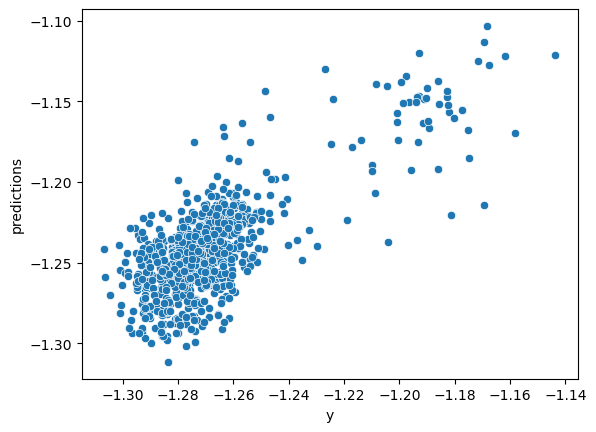

In [110]:
sns.scatterplot(data=cs_test_data, x="y", y="predictions")
plt.show()

In [111]:
coi = ["predictions", column_name[-1]]
plot_data = cs_test_data[coi].reset_index(drop=0)

In [112]:
plot_data[coi] = cs_target_scaler.inverse_transform(cs_test_data[coi])
plot_data.head()

time  predictions         y
0  2023-12-01 00:00:00+00     0.432043  0.431638
1  2023-12-01 01:00:00+00     0.431773  0.432706
2  2023-12-01 02:00:00+00     0.433207  0.432545
3  2023-12-01 03:00:00+00     0.433514  0.433203
4  2023-12-01 04:00:00+00     0.434595  0.432696

In [113]:
model_predictions[["time", "cs_predictions"]] = plot_data[["time", "predictions"]]

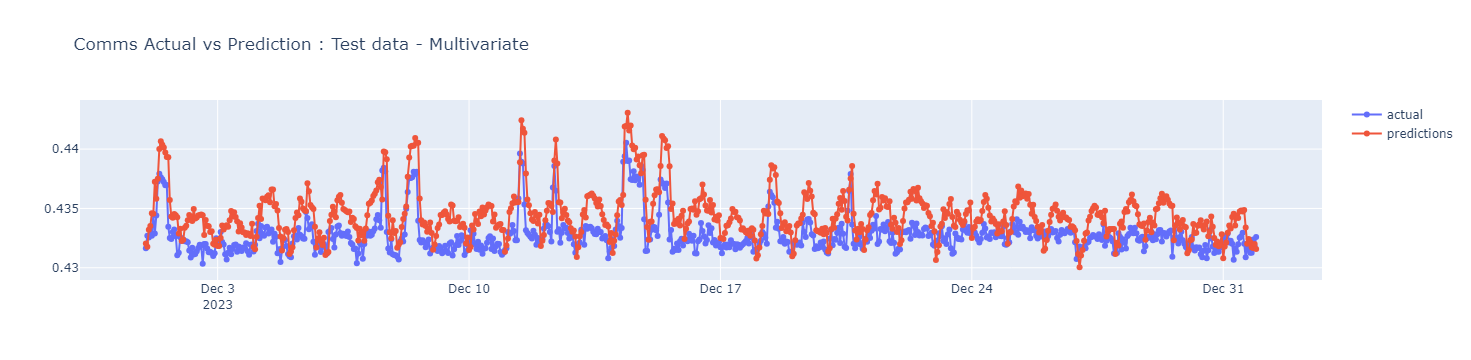

In [114]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["y"].to_numpy(),
                    mode='lines+markers',
                    name='actual'))
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["predictions"].to_numpy(),
                    mode='lines+markers',
                    name='predictions'))
fig.update_layout(title_text="Comms Actual vs Prediction : Test data - Multivariate")
fig.show()

In [47]:
file_name = 'multi_LR_comms_services.html'
plotly.offline.plot(fig, filename=asset_path + file_name)

'.././assets/multi_LR_comms_services.html'

### Space Heating

In [115]:
column_name = ["space_heating", 'weekend', 'bank_holiday',
       'hour', 'day_of_week', 'day_of_month', 'month', 'year',
       'forecast_temperature', 'forecast_feelslike', 'forecast_weathertype',
       'forecast_windspeed', 'forecast_uvindex',
       'forecast_precipitationprobability', 'forecast_winddirection',
       'forecast_visibility', 'sine_hour', 'cos_hour', 'sine_month',
       'cos_month', 'sine_day_of_week', 'cos_day_of_week',
       'sine_forecast_winddirection', 'cos_forecast_winddirection', "y"]

# transform the data
sh_data = data.copy()
sh_data["y"] = sh_data[column_name[0]].shift(-1)
sh_data = sh_data.dropna(axis=0)
sh_data_scaler, sh_transformed_data = create_std_scaler(sh_data, column_name[:-1])
sh_target_scaler, sh_transformed_target_data = create_std_scaler(sh_data, column_name[-1])

sh_transformed_data = pd.concat([sh_transformed_data, sh_transformed_target_data],ignore_index=False, axis=1)

# # Training and testing data for comms and services
sh_train_data = sh_transformed_data[sh_transformed_data.index < '2023-12-01'][column_name]
sh_test_data = sh_transformed_data[sh_transformed_data.index >= '2023-12-01'][column_name]
sh_train_data.shape, sh_test_data.shape

                              columns         mean     variance  scale_factor
0                       space_heating     0.926123     1.421973      1.192465
1                             weekend     0.286993     0.204628      0.452358
2                        bank_holiday     0.025213     0.024577      0.156772
3                                hour    11.535115    47.970256      6.926056
4                         day_of_week     2.990234     4.013484      2.003368
5                        day_of_month    15.761721    77.705100      8.815050
6                               month     6.521380    11.891658      3.448428
7                                year  2022.015369     0.664680      0.815279
8                forecast_temperature    11.857710    21.556696      4.642919
9                  forecast_feelslike     9.363177    29.404385      5.422581
10               forecast_weathertype     6.340998    23.527392      4.850504
11                 forecast_windspeed    15.113147    51.363798 

((24958, 25), (743, 25))

In [116]:
multi_lin_reg = LinearRegression()

In [117]:
multi_lin_reg_fit = multi_lin_reg.fit(sh_train_data[column_name[:-1]], sh_train_data[column_name[-1]])

In [118]:
sh_test_data["predictions"] = multi_lin_reg_fit.predict(sh_test_data[column_name[:-1]])

In [119]:
cal_metrics(sh_test_data["y"], sh_test_data["predictions"])

MAE:
0.33111115698432503
MAPE:
3.0466792437325685
R2 score: 
0.6633470415609728


In [120]:
coi = ["predictions", column_name[-1]]
plot_data = sh_test_data[coi].reset_index(drop=0)

plot_data[coi] = sh_target_scaler.inverse_transform(plot_data[coi])

plot_data.head()

time  predictions         y
0  2023-12-01 00:00:00+00     3.426903  4.022571
1  2023-12-01 01:00:00+00     3.845152  4.779787
2  2023-12-01 02:00:00+00     4.403943  6.118017
3  2023-12-01 03:00:00+00     5.394992  6.056735
4  2023-12-01 04:00:00+00     5.316334  6.016239

In [121]:
model_predictions["sh_predictions"] = plot_data["predictions"]

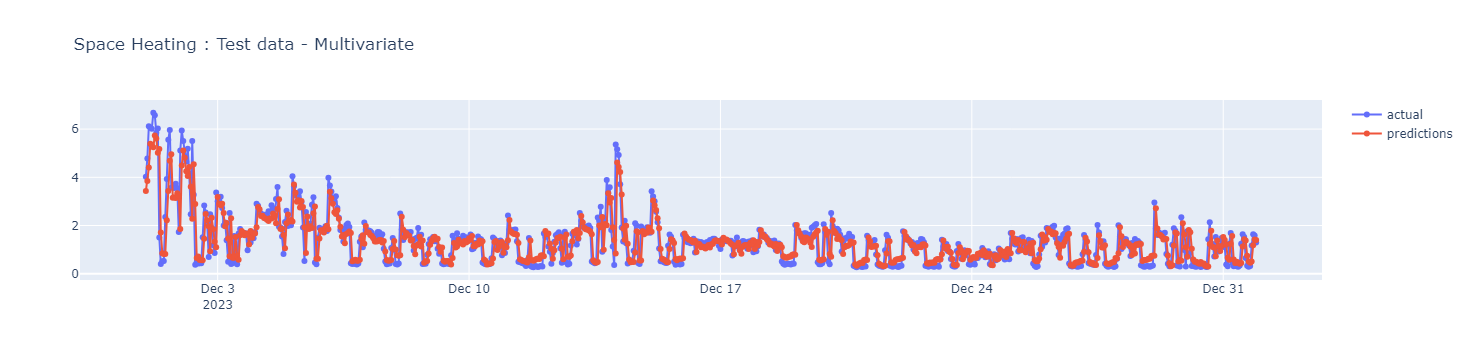

In [122]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["y"].to_numpy(),
                    mode='lines+markers',
                    name='actual'))
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["predictions"].to_numpy(),
                    mode='lines+markers',
                    name='predictions'))
fig.update_layout(title_text="Space Heating : Test data - Multivariate")
fig.show()

In [64]:
file_name = 'multi_LR_space_heating.html'
plotly.offline.plot(fig, filename=asset_path + file_name)

'.././assets/multi_LR_space_heating.html'

### Car chargers

In [123]:
column_name = ["car_chargers", 'weekend', 'bank_holiday',
       'hour', 'day_of_week', 'day_of_month', 'month', 'year',
       'forecast_temperature', 'forecast_feelslike', 'forecast_weathertype',
       'forecast_windspeed', 'forecast_uvindex',
       'forecast_precipitationprobability', 'forecast_winddirection',
       'forecast_visibility', 'sine_hour', 'cos_hour', 'sine_month',
       'cos_month', 'sine_day_of_week', 'cos_day_of_week',
       'sine_forecast_winddirection', 'cos_forecast_winddirection', "y"]

# transform the data
cc_data = data.copy()
cc_data["y"] = cc_data[column_name[0]].shift(-1)
cc_data = cc_data.dropna(axis=0)
cc_data_scaler, cc_transformed_data = create_std_scaler(cc_data, column_name[:-1])
cc_target_scaler, cc_transformed_target_data = create_std_scaler(cc_data, column_name[-1])

cc_transformed_data = pd.concat([cc_transformed_data, cc_transformed_target_data], ignore_index=False, axis=1)

# # Training and testing data for comms and services
cc_train_data = cc_transformed_data[cc_transformed_data.index < '2023-12-01'][column_name]
cc_test_data = cc_transformed_data[cc_transformed_data.index >= '2023-12-01'][column_name]
cc_train_data.shape, cc_test_data.shape

                              columns         mean     variance  scale_factor
0                        car_chargers     1.054399     9.303331      3.050136
1                             weekend     0.286993     0.204628      0.452358
2                        bank_holiday     0.025213     0.024577      0.156772
3                                hour    11.535115    47.970256      6.926056
4                         day_of_week     2.990234     4.013484      2.003368
5                        day_of_month    15.761721    77.705100      8.815050
6                               month     6.521380    11.891658      3.448428
7                                year  2022.015369     0.664680      0.815279
8                forecast_temperature    11.857710    21.556696      4.642919
9                  forecast_feelslike     9.363177    29.404385      5.422581
10               forecast_weathertype     6.340998    23.527392      4.850504
11                 forecast_windspeed    15.113147    51.363798 

((24958, 25), (743, 25))

In [124]:
multi_lin_reg = LinearRegression()
multi_lin_reg_fit = multi_lin_reg.fit(cc_train_data[column_name[:-1]], cc_train_data[column_name[-1]])

cc_test_data["predictions"] = multi_lin_reg_fit.predict(cc_test_data[column_name[:-1]])
cal_metrics(cc_test_data["y"], cc_test_data["predictions"])

coi = ["predictions", column_name[-1]]
plot_data = cc_test_data[coi].reset_index(drop=0)

plot_data[coi] = cc_target_scaler.inverse_transform(plot_data[coi])

plot_data.head()

MAE:
0.33136763226844146
MAPE:
0.6676594976459076
R2 score: 
0.7666915833734114


time  predictions    y
0  2023-12-01 00:00:00+00     0.013888  0.0
1  2023-12-01 01:00:00+00     0.221530  0.0
2  2023-12-01 02:00:00+00     0.434178  0.0
3  2023-12-01 03:00:00+00     0.644710  0.0
4  2023-12-01 04:00:00+00     0.840710  0.0

In [125]:
model_predictions["cc_predictions"] = plot_data["predictions"]

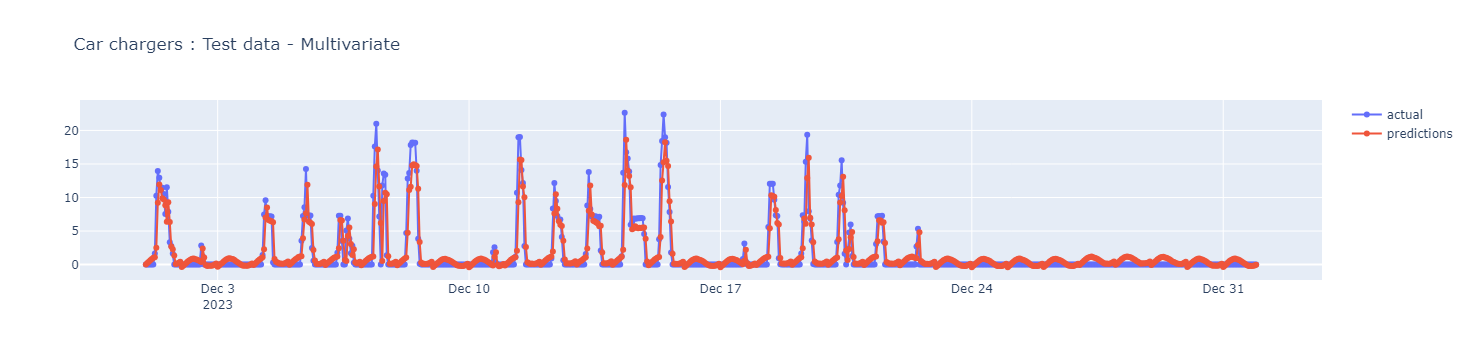

In [126]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["y"].to_numpy(),
                    mode='lines+markers',
                    name='actual'))
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["predictions"].to_numpy(),
                    mode='lines+markers',
                    name='predictions'))
fig.update_layout(title_text="Car chargers : Test data - Multivariate")
fig.show()

In [67]:
file_name = 'multi_LR_car_chargers.html'
plotly.offline.plot(fig, filename=asset_path + file_name)

'.././assets/multi_LR_car_chargers.html'

### All others

In [131]:
col_name = [
    'hot_water', 'sockets','lighting', 'weekend', 'bank_holiday',
       'hour', 'day_of_week', 'day_of_month', 'month', 'year',
       'forecast_temperature', 'forecast_feelslike', 'forecast_weathertype',
       'forecast_windspeed', 'forecast_uvindex',
       'forecast_precipitationprobability', 'forecast_winddirection',
       'forecast_visibility', 'sine_hour', 'cos_hour', 'sine_month',
       'cos_month', 'sine_day_of_week', 'cos_day_of_week',
       'sine_forecast_winddirection', 'cos_forecast_winddirection'
]
bldg_data = data[col_name]
bldg_data["total_load"] = bldg_data[['hot_water', 'sockets','lighting']].sum(axis=1)
column_name =   [
    "total_load", 'weekend', 'bank_holiday',
       'hour', 'day_of_week', 'day_of_month', 'month', 'year',
       'forecast_temperature', 'forecast_feelslike', 'forecast_weathertype',
       'forecast_windspeed', 'forecast_uvindex',
       'forecast_precipitationprobability', 'forecast_winddirection',
       'forecast_visibility', 'sine_hour', 'cos_hour', 'sine_month',
       'cos_month', 'sine_day_of_week', 'cos_day_of_week',
       'sine_forecast_winddirection', 'cos_forecast_winddirection', "y"
]

# transform the data
bldg_data["y"] = bldg_data[column_name[0]].shift(-1)
bldg_data = bldg_data.dropna(axis=0)
bldg_data_scaler, bldg_transformed_data = create_std_scaler(bldg_data, column_name[:-1])
bldg_target_scaler, bldg_transformed_target_data = create_std_scaler(bldg_data, column_name[-1])

bldg_transformed_data = pd.concat([bldg_transformed_data, bldg_transformed_target_data], ignore_index=False, axis=1)

# # Training and testing data for comms and services
bldg_train_data = bldg_transformed_data[bldg_transformed_data.index < '2023-12-01'][column_name]
bldg_test_data = bldg_transformed_data[bldg_transformed_data.index >= '2023-12-01'][column_name]
bldg_train_data.shape, bldg_test_data.shape

                              columns         mean     variance  scale_factor
0                          total_load     0.498093     0.332070      0.576255
1                             weekend     0.286993     0.204628      0.452358
2                        bank_holiday     0.025213     0.024577      0.156772
3                                hour    11.535115    47.970256      6.926056
4                         day_of_week     2.990234     4.013484      2.003368
5                        day_of_month    15.761721    77.705100      8.815050
6                               month     6.521380    11.891658      3.448428
7                                year  2022.015369     0.664680      0.815279
8                forecast_temperature    11.857710    21.556696      4.642919
9                  forecast_feelslike     9.363177    29.404385      5.422581
10               forecast_weathertype     6.340998    23.527392      4.850504
11                 forecast_windspeed    15.113147    51.363798 

C:\Users\akson\AppData\Local\Temp\ipykernel_16024\2293674332.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\akson\AppData\Local\Temp\ipykernel_16024\2293674332.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



((24958, 25), (743, 25))

#### Multivariate Linear Regressor

In [132]:
multi_lin_reg = LinearRegression()
multi_lin_reg_fit = multi_lin_reg.fit(bldg_train_data[column_name[:-1]], bldg_train_data[column_name[-1]])

bldg_test_data["predictions"] = multi_lin_reg_fit.predict(bldg_test_data[column_name[:-1]])
cal_metrics(bldg_test_data["y"], bldg_test_data["predictions"])

coi = ["predictions", column_name[-1]]
plot_data = bldg_test_data[coi].reset_index(drop=0)

plot_data[coi] = bldg_target_scaler.inverse_transform(plot_data[coi])

plot_data.head()

MAE:
0.579026449349945
MAPE:
1.5897634972416286
R2 score: 
0.16150432224546174


time  predictions         y
0  2023-12-01 00:00:00+00     0.390620  0.336652
1  2023-12-01 01:00:00+00     0.426471  0.761239
2  2023-12-01 02:00:00+00     0.656782  0.334816
3  2023-12-01 03:00:00+00     0.547521  0.327463
4  2023-12-01 04:00:00+00     0.605041  0.316699

#### Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
rf_reg = RandomForestRegressor()
rf_reg_fit = rf_reg.fit(bldg_train_data[column_name[:-1]], bldg_train_data[column_name[-1]])

In [135]:
bldg_test_data["rf_predictions"] = rf_reg_fit.predict(bldg_test_data[column_name[:-1]])
cal_metrics(bldg_test_data["y"], bldg_test_data["rf_predictions"])
rf_pred = bldg_test_data[["rf_predictions"]].reset_index(drop=0)

plot_data = plot_data.merge(rf_pred, on="time", how="inner")
plot_data["rf_predictions"] = bldg_target_scaler.inverse_transform(plot_data[["rf_predictions"]])

plot_data.head()

MAE:
0.47114145609188474
MAPE:
1.372823923315916
R2 score: 
0.5190381581114354


time  predictions         y  rf_predictions
0  2023-12-01 00:00:00+00     0.390620  0.336652        0.513854
1  2023-12-01 01:00:00+00     0.426471  0.761239        0.526595
2  2023-12-01 02:00:00+00     0.656782  0.334816        0.333532
3  2023-12-01 03:00:00+00     0.547521  0.327463        0.504739
4  2023-12-01 04:00:00+00     0.605041  0.316699        0.528441

#### XGB Regressor

In [136]:
import xgboost as xg

In [137]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 50, seed = 123)
xgb_r_fit = xgb_r.fit(bldg_train_data[column_name[:-1]], bldg_train_data[column_name[-1]])

In [138]:
bldg_test_data["xgb_predictions"] = xgb_r_fit.predict(bldg_test_data[column_name[:-1]])
cal_metrics(bldg_test_data["y"], bldg_test_data["xgb_predictions"])
rf_pred = bldg_test_data[["xgb_predictions"]].reset_index(drop=0)

plot_data = plot_data.merge(rf_pred, on="time", how="inner")
plot_data["xgb_predictions"] = bldg_target_scaler.inverse_transform(plot_data[["xgb_predictions"]])

plot_data.head()

MAE:
0.5000075362033143
MAPE:
1.3062394182953327
R2 score: 
0.4123297220282074


time  predictions         y  rf_predictions  \
0  2023-12-01 00:00:00+00     0.390620  0.336652        0.513854   
1  2023-12-01 01:00:00+00     0.426471  0.761239        0.526595   
2  2023-12-01 02:00:00+00     0.656782  0.334816        0.333532   
3  2023-12-01 03:00:00+00     0.547521  0.327463        0.504739   
4  2023-12-01 04:00:00+00     0.605041  0.316699        0.528441   

   xgb_predictions  
0         0.466932  
1         0.482774  
2         0.379588  
3         0.487238  
4         0.482250

#### ANN

In [139]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [140]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(bldg_train_data[column_name[:-1]].shape[1],)))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

C:\Users\akson\anaconda3\envs\ra_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
model.fit(bldg_train_data[column_name[:-1]], bldg_train_data[column_name[-1]])

780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8533


In [142]:
bldg_test_data["ann_predictions"] = model.predict(bldg_test_data[column_name[:-1]])
cal_metrics(bldg_test_data["y"], bldg_test_data["ann_predictions"])
rf_pred = bldg_test_data[["ann_predictions"]].reset_index(drop=0)

plot_data = plot_data.merge(rf_pred, on="time", how="inner")
plot_data["ann_predictions"] = bldg_target_scaler.inverse_transform(plot_data[["ann_predictions"]])

plot_data.head()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE:
0.5540599142381857
MAPE:
1.4249522819099225
R2 score: 
0.19431594623168846


time  predictions         y  rf_predictions  \
0  2023-12-01 00:00:00+00     0.390620  0.336652        0.513854   
1  2023-12-01 01:00:00+00     0.426471  0.761239        0.526595   
2  2023-12-01 02:00:00+00     0.656782  0.334816        0.333532   
3  2023-12-01 03:00:00+00     0.547521  0.327463        0.504739   
4  2023-12-01 04:00:00+00     0.605041  0.316699        0.528441   

   xgb_predictions  ann_predictions  
0         0.466932         0.335050  
1         0.482774         0.388414  
2         0.379588         0.579548  
3         0.487238         0.529276  
4         0.482250         0.597749

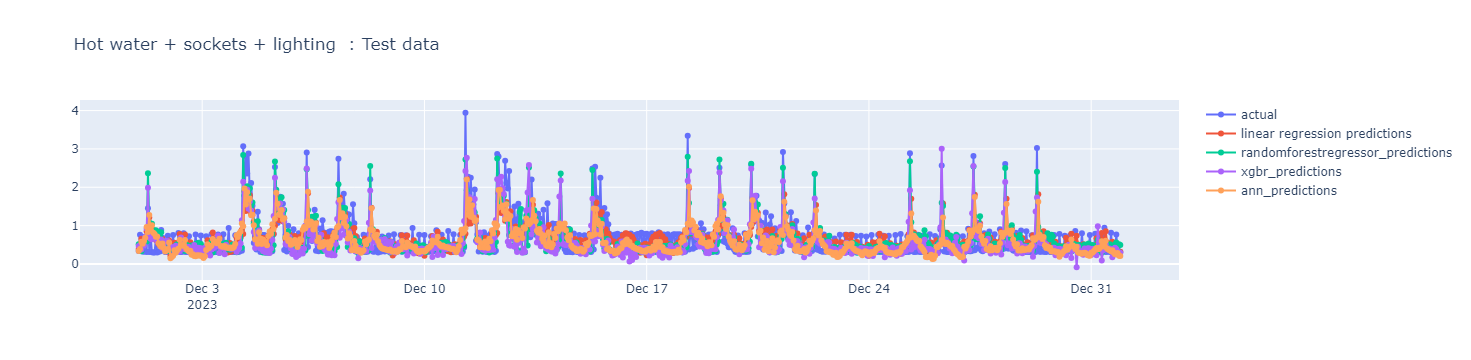

In [143]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["y"].to_numpy(),
                    mode='lines+markers',
                    name='actual'))
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["predictions"].to_numpy(),
                    mode='lines+markers',
                    name='linear regression predictions'))
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["rf_predictions"].to_numpy(),
                    mode='lines+markers',
                    name='randomforestregressor_predictions'))
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["xgb_predictions"].to_numpy(),
                    mode='lines+markers',
                    name='xgbr_predictions'))
fig.add_trace(go.Scatter(x=plot_data["time"].to_numpy(), y=plot_data["ann_predictions"].to_numpy(),
                    mode='lines+markers',
                    name='ann_predictions'))
fig.update_layout(title_text="Hot water + sockets + lighting  : Test data")
fig.show()

In [144]:
file_name = 'all_other.html'
plotly.offline.plot(fig, filename=asset_path + file_name)

'.././assets/all_other.html'

### Composite model

In [145]:
model_predictions.head()

time  cs_predictions  sh_predictions  cc_predictions
0  2023-12-01 00:00:00+00        0.432043        3.426903        0.013888
1  2023-12-01 01:00:00+00        0.431773        3.845152        0.221530
2  2023-12-01 02:00:00+00        0.433207        4.403943        0.434178
3  2023-12-01 03:00:00+00        0.433514        5.394992        0.644710
4  2023-12-01 04:00:00+00        0.434595        5.316334        0.840710

In [146]:
plot_data = plot_data.rename(columns={"predictions": "linear_predictions"})
plot_data.head()

time  linear_predictions         y  rf_predictions  \
0  2023-12-01 00:00:00+00            0.390620  0.336652        0.513854   
1  2023-12-01 01:00:00+00            0.426471  0.761239        0.526595   
2  2023-12-01 02:00:00+00            0.656782  0.334816        0.333532   
3  2023-12-01 03:00:00+00            0.547521  0.327463        0.504739   
4  2023-12-01 04:00:00+00            0.605041  0.316699        0.528441   

   xgb_predictions  ann_predictions  
0         0.466932         0.335050  
1         0.482774         0.388414  
2         0.379588         0.579548  
3         0.487238         0.529276  
4         0.482250         0.597749

In [147]:
plot_data = plot_data.drop(columns=["y"], axis=1)
plot_data.head()

time  linear_predictions  rf_predictions  \
0  2023-12-01 00:00:00+00            0.390620        0.513854   
1  2023-12-01 01:00:00+00            0.426471        0.526595   
2  2023-12-01 02:00:00+00            0.656782        0.333532   
3  2023-12-01 03:00:00+00            0.547521        0.504739   
4  2023-12-01 04:00:00+00            0.605041        0.528441   

   xgb_predictions  ann_predictions  
0         0.466932         0.335050  
1         0.482774         0.388414  
2         0.379588         0.579548  
3         0.487238         0.529276  
4         0.482250         0.597749

In [148]:
tmp_data = data[["car_chargers", "bld_engcons"]].reset_index(drop=0)
comp_data = plot_data[["time", "rf_predictions"]].merge(tmp_data, on="time", how="inner").reset_index(drop=1)
comp_data.shape, plot_data.shape

((743, 4), (743, 5))

In [149]:
comp_data.head()

time  rf_predictions  car_chargers  bld_engcons
0  2023-12-01 00:00:00+00        0.513854           0.0     4.272741
1  2023-12-01 01:00:00+00        0.526595           0.0     4.790861
2  2023-12-01 02:00:00+00        0.333532           0.0     5.973732
3  2023-12-01 03:00:00+00        0.504739           0.0     6.885378
4  2023-12-01 04:00:00+00        0.528441           0.0     6.817401

In [150]:
model_predictions.head()

time  cs_predictions  sh_predictions  cc_predictions
0  2023-12-01 00:00:00+00        0.432043        3.426903        0.013888
1  2023-12-01 01:00:00+00        0.431773        3.845152        0.221530
2  2023-12-01 02:00:00+00        0.433207        4.403943        0.434178
3  2023-12-01 03:00:00+00        0.433514        5.394992        0.644710
4  2023-12-01 04:00:00+00        0.434595        5.316334        0.840710

In [151]:
comp_data = comp_data.merge(model_predictions, on="time", how="inner")
comp_data.shape

(743, 7)

In [152]:
comp_data.head()

time  rf_predictions  car_chargers  bld_engcons  \
0  2023-12-01 00:00:00+00        0.513854           0.0     4.272741   
1  2023-12-01 01:00:00+00        0.526595           0.0     4.790861   
2  2023-12-01 02:00:00+00        0.333532           0.0     5.973732   
3  2023-12-01 03:00:00+00        0.504739           0.0     6.885378   
4  2023-12-01 04:00:00+00        0.528441           0.0     6.817401   

   cs_predictions  sh_predictions  cc_predictions  
0        0.432043        3.426903        0.013888  
1        0.431773        3.845152        0.221530  
2        0.433207        4.403943        0.434178  
3        0.433514        5.394992        0.644710  
4        0.434595        5.316334        0.840710

In [165]:
cols = ["rf_predictions", "cs_predictions", "sh_predictions"]
comp_data["bld_engcons_predicted"] = comp_data[cols].sum(axis=1)
comp_data.head()

time  rf_predictions  car_chargers  bld_engcons  \
0  2023-12-01 00:00:00+00        0.513854           0.0     4.272741   
1  2023-12-01 01:00:00+00        0.526595           0.0     4.790861   
2  2023-12-01 02:00:00+00        0.333532           0.0     5.973732   
3  2023-12-01 03:00:00+00        0.504739           0.0     6.885378   
4  2023-12-01 04:00:00+00        0.528441           0.0     6.817401   

   cs_predictions  sh_predictions  cc_predictions  bld_engcons_predicted  
0        0.432043        3.426903        0.013888               4.372800  
1        0.431773        3.845152        0.221530               4.803520  
2        0.433207        4.403943        0.434178               5.170683  
3        0.433514        5.394992        0.644710               6.333246  
4        0.434595        5.316334        0.840710               6.279370

In [166]:
cal_metrics(comp_data["bld_engcons"], comp_data["bld_engcons_predicted"])

MAE:
0.38434695173572375
MAPE:
0.167229366850921
R2 score: 
0.7873453452668214


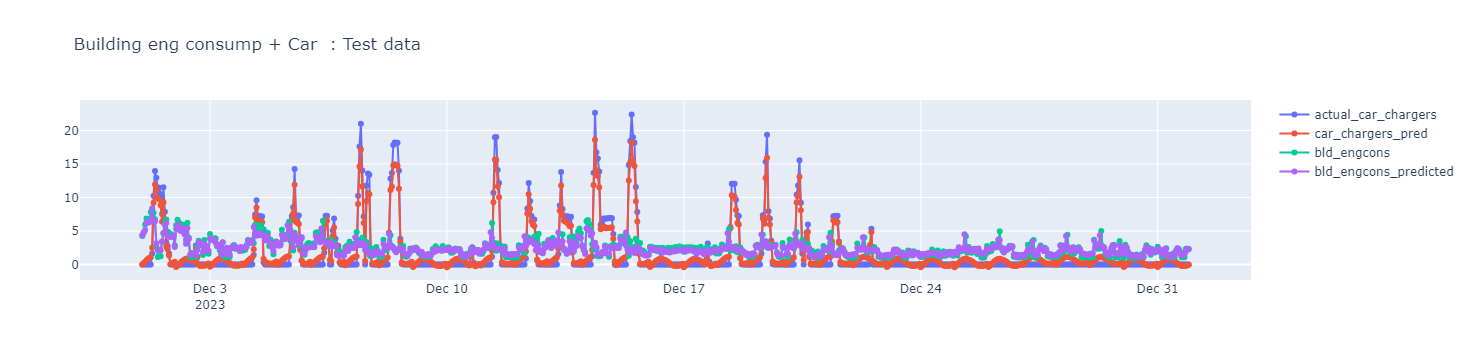

In [167]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp_data["time"].to_numpy(), y=comp_data["car_chargers"].to_numpy(),
                    mode='lines+markers',
                    name='actual_car_chargers'))
fig.add_trace(go.Scatter(x=comp_data["time"].to_numpy(), y=comp_data["cc_predictions"].to_numpy(),
                    mode='lines+markers',
                    name='car_chargers_pred'))
fig.add_trace(go.Scatter(x=comp_data["time"].to_numpy(), y=comp_data["bld_engcons"].to_numpy(),
                    mode='lines+markers',
                    name='bld_engcons'))
fig.add_trace(go.Scatter(x=comp_data["time"].to_numpy(), y=comp_data["bld_engcons_predicted"].to_numpy(),
                    mode='lines+markers',
                    name='bld_engcons_predicted'))
fig.update_layout(title_text="Building eng consump + Car  : Test data")
fig.show()

In [168]:
file_name = 'bldg_eng_consump.html'
plotly.offline.plot(fig, filename=asset_path + file_name)

'.././assets/bldg_eng_consump.html'